# PyTorch Computer Vision

## 1. Importing Dependencies

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


## 2. Getting Dataset

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
#class names
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
#clasess to idx 
classes_to_idx = train_data.class_to_idx
classes_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.2 Visualization of data

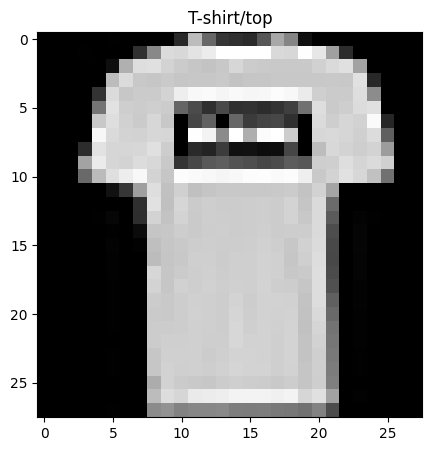

In [8]:
image, label = train_data[1]
plt.figure(figsize=(5,5))
plt.title(class_names[label])
plt.imshow(image.squeeze(),cmap='gray')

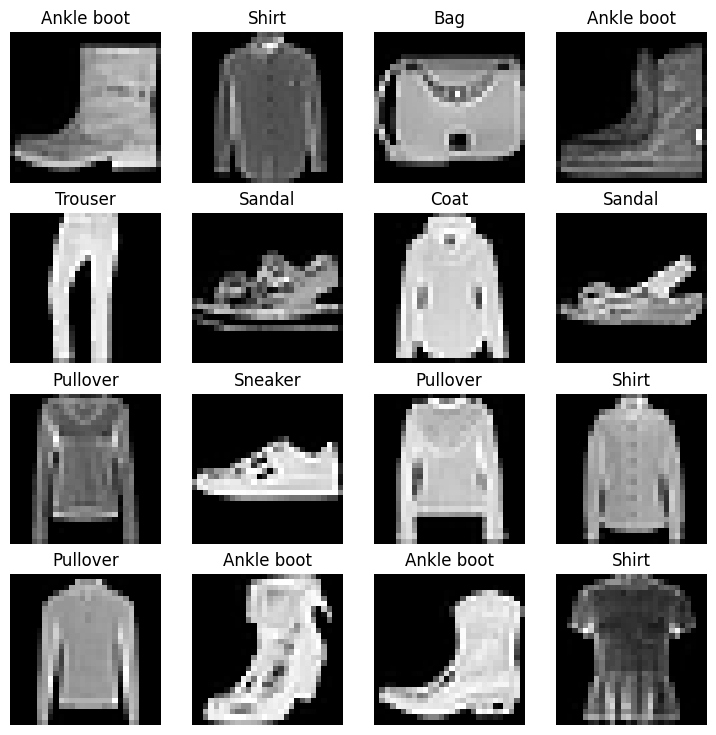

In [9]:
#plot more random images from the dataset
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4 #16 images, labels

for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Preparing DataLoader

In [10]:
from torch.utils.data import DataLoader

In [11]:
#Setup Batch size hyperparameters
BATCH_SIZE = 32 

#Dataloader - Turn dataset into iterable (batches)
train_dataloader = DataLoader(dataset=train_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ce5a3ed520>,
 <torch.utils.data.dataloader.DataLoader at 0x1ce5a7b7f70>)

In [12]:
#Let's check out what's we've created
print(f'Dataloader: {train_dataloader, test_dataloader}')
print('Batch Size: 32')
print(f'Length of Train Dataloader: {len(train_dataloader)}')
print(f'Length of Test Dataloader: {len(test_dataloader)}')
print(f'{len(train_data)/32}')

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x000001CE5A3ED520>, <torch.utils.data.dataloader.DataLoader object at 0x000001CE5A7B7F70>)
Batch Size: 32
Length of Train Dataloader: 1875
Length of Test Dataloader: 313
1875.0


In [13]:
#check out what's inside the train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

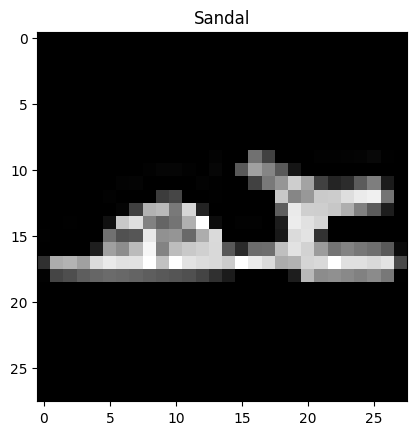

In [14]:
#Show a sample (random)
random_idx = torch.randint(1,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.show()

## 3. Model 0: Build a Basline Model

When starting to build a series of machine learning modelling experiments, it's best pratice to start with a baseline model.

A Baseline model is a simple model you will try and improve upon with subsequent models/experiments. 

In other words: start simply and add complexity when neccessary!

In [15]:
#creating a Flatten layer 
flatten_model = nn.Flatten()

#get a single sample 
x = train_features_batch[0]

print(f'Orginal Shape: {x.shape} -> [color_channel, height, width]')

#Flatten the sample 
output = flatten_model(x)

#print what's happening 
print(f'Flattened X shape: {output.shape} -> [color_channel, height*width]') #flattened output

Orginal Shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Flattened X shape: torch.Size([1, 784]) -> [color_channel, height*width]


In [16]:
28*28 

784

One value per pixel!

In [17]:
from torch import nn 

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        ) 
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [18]:
#does our model need non-linearity to learn!
#let's find out!

torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, #28*28 (flattened)
                              hidden_units=524,
                             output_shape=len(class_names) #class labels
                             ).to('cpu')

In [19]:
#pass a dummy x 
dummy_x = torch.rand([1,1,28,28]) #[batch_size (1), color_channels(1) - gray, height, weight]

dummy_x.shape

torch.Size([1, 1, 28, 28])

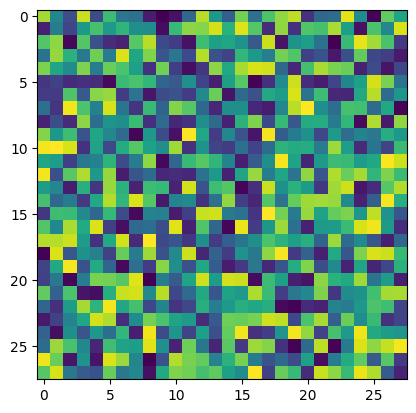

In [20]:
#plot this dummy x (random)
plt.imshow(dummy_x.squeeze())

In [21]:
model_0(dummy_x)

tensor([[ 0.1566, -0.0282,  0.0274, -0.2790,  0.4473,  0.1897, -0.0755, -0.0300,
         -0.0104,  0.0050]], grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0041,  0.0226, -0.0340,  ...,  0.0312, -0.0041,  0.0036],
                      [-0.0144, -0.0357, -0.0258,  ...,  0.0058, -0.0035,  0.0034],
                      [ 0.0311, -0.0223, -0.0316,  ...,  0.0181, -0.0326,  0.0032]])),
             ('layer_stack.1.bias',
              tensor([-0.0141,  0.0156,  0.0253,  0.0164,  0.0193, -0.0355, -0.0276,  0.0266,
                      -0.0250, -0.0264,  0.0052, -0.0179,  0.0296,  0.0309, -0.0246,  0.0017,
                      -0.0017, -0.0159,  0.0062,  0.0316,  0.0211,  0.0215,  0.0133, -0.0229,
                      -0.0190,  0.0186, -0.0297,  0.0193,  0.0146, -0.0201,  0.0235, -0.0294,
                

### 3.1 Setup Loss, Optimizer and Evaluation metrics

* **Loss function** - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()` 
* **Optimizer** - SGD or Adam.
* **Evaluation Metric** - since we are working with classification, let's use Accuracy as our evaluation metric. 

In [23]:
import requests 
from pathlib import Path

#Download helper functions from repo
url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'

if Path('helper_functions.py').is_file(): 
    print('helper_function.py Already exists!, Skipping Download...')
else: 
    print('Downloading helper_function.py')
    request = requests.get(url)
    with open('helper_function.py','wb') as f: 
        f.write(request.content)

In [24]:
#import accuracy metric 
from helper_function import accuracy_fn

#setup loss function
loss_fn = nn.CrossEntropyLoss() 

#setup optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

### 3.2 Creating a function to time our experiments 

Machine Learning is very experimental. 

Two of the main things you'll often want to track are: 

1. Model's Performance (loss and Accuracy values). (Effective-ness)
2. How fast it runs. (Efficency)

In [25]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None):
    '''
    Prints Difference between start and end time.
    '''
    total_time = end - start 
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [26]:
#sample test 
start_time = timer() 
##
## Some code here!
##
end_time = timer() 
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


3.4299999999376496e-05

### 3.3 Creating a Training Loop and training a Model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**.
4. Print out what's happening.
5. Time it all.

In [27]:
#import tqdm for progress bar

In [28]:
#import tqdm for progress bar 
from tqdm import tqdm 

#set the seed and start tim
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of Epochs 
EPOCHS = 3 

#Create training and test loop 
for epoch in tqdm(range(EPOCHS)):
    print(f'Epoch: {epoch}\n------')
    #Training 
    train_loss = 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        #training mode
        model_0.train()
        #1. forward pass 
        y_pred = model_0(X)

        #2. Calculate the loss (per Batch) 
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss

        #3. optimizer zero grad 
        optimizer.zero_grad()

        #4. Loss backwards 
        loss.backward()

        #5. optimizer step 
        optimizer.step()

        #printing out what's happening
        if batch % 400 == 0: 
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

    #Divide total train loss by length of train dataloader 
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0,0 
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #1. forward pass 
            test_pred = model_0(X_test)

            #2. calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test )

            #3 accuracy 
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) 
     
        ## Calculate the Test loss Average per batch
        test_loss /= len(test_dataloader)
    
        ## calculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

    #printing what's happening!
    print(f'\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f}')

#calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                            end=train_time_end_on_cpu, 
                                            device=str(next(model_0.parameters()).device))

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|████████████████████████████                                                        | 1/3 [00:14<00:29, 14.68s/it]


Train Loss: 0.5696 | Test Loss: 0.5005 - Test Acc: 82.5379
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:29<00:14, 14.74s/it]


Train Loss: 0.4738 | Test Loss: 0.4848 - Test Acc: 82.9073
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:46<00:00, 15.64s/it]


Train Loss: 0.4539 | Test Loss: 0.4770 - Test Acc: 83.4565
Train time on cpu: 46.913 seconds


In [29]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make Predictions and get Model 0 results

In [30]:
#random seed
torch.manual_seed(42) 

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device):
    """Returns a dictionary containing the results of model predicting on data_loader. """
    
    loss, acc = 0, 0
    model.eval() 
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # put the data on device 
            X, y = X.to(device), y.to(device)
            # Make Predictions
            y_pred = model(X)

            #Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss/acc per batch. 
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__, #only works when our model was created with a Class
           'model_loss': loss.item(), 
           'model_acc':acc}

In [65]:
#Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0, 
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn, device='cpu')
model_0_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 156.43it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4770429730415344,
 'model_acc': 83.4564696485623}

## 5. Setup Device Agnostic-code (for using a GPU if there is one!)

In [32]:
!nvidia-smi

Sun Dec 10 09:33:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8     4W /  N/A |    126MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'Target Device: {device}')

Target Device: cuda


### 6. Model-1: Building a better model with (Linearity & Non-Linearity) 

We learned about the power of Non-linearity

In [34]:
#Create a model with linear layers and non-linear layers
from torch import nn 
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector.
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.layers_stack(x)

In [35]:
28*28

784

In [36]:
#create a instance of model
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=524, output_shape=len(class_names))

model_1.to(device)

FashionMNISTModelV1(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=524, bias=True)
    (2): ReLU()
    (3): Linear(in_features=524, out_features=524, bias=True)
    (4): ReLU()
    (5): Linear(in_features=524, out_features=10, bias=True)
  )
)

In [37]:
model_1.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
                      [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
                      [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
                      ...,
                      [-0.0340,  0.0078,  0.0110,  ...,  0.0036, -0.0144, -0.0357],
                      [-0.0258, -0.0112,  0.0320,  ...,  0.0034,  0.0311, -0.0223],
                      [-0.0316,  0.0255, -0.0300,  ...,  0.0032, -0.0141,  0.0156]],
                     device='cuda:0')),
             ('layers_stack.1.bias',
              tensor([ 0.0253,  0.0164,  0.0193, -0.0355, -0.0276,  0.0266, -0.0250, -0.0264,
                       0.0052, -0.0179,  0.0296,  0.0309, -0.0246,  0.0017, -0.0017, -0.0159,
                       0.0062,  0.0316,  0.0211,  0.0215,  0.0133, -0.0229, -0.0190,  0.0186,
                      -0.0297,  0.0193,  0.0146, -0.0201,  0.0235, -0.

Here, we couldn't find ReLu layer weights & Bias, because it's not learnable layer! 

In [38]:
#check on what device we are on? 
next(model_1.parameters()).device

device(type='cuda', index=0)

So, now our model is going to train using GPU!

In [39]:
#create random dummy x 
dummy_x = torch.rand([1,28,28]) #[batch_size, color_channel, height, weight]

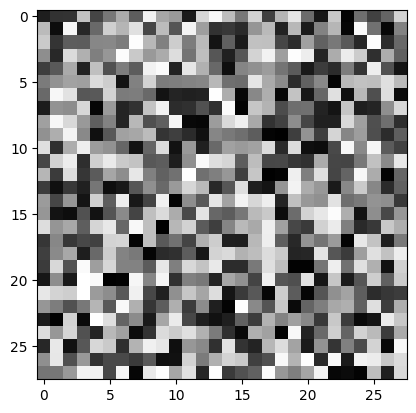

In [40]:
#visualize dummy_x
plt.imshow(dummy_x.squeeze(), cmap='gray')

In [41]:
#random prediction on dummy_x
model_1.eval()
with torch.inference_mode():
    pred = model_1(dummy_x.to(device)).squeeze()

In [42]:
pred

tensor([-0.0859,  0.0575,  0.0546, -0.0168,  0.0835, -0.1079,  0.0813,  0.0162,
         0.0380, -0.0575], device='cuda:0')

In [43]:
#raw logits of 10 classes
len(pred)

10

In [44]:
pred_label = pred.argmax()

print(f'Predicted label: {class_names[pred_label]}')

Predicted label: Coat


### 6.1  Setup Loss function & Optimizer 

In [45]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.01)

### 6.2 Functionizing Training Loop & Test Loop  

Let's create a function for: 
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [46]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, 
               accuracy_fn, device: torch.device = device):
    '''Performs Training loop'''
    train_loss, train_acc = 0,0
    
    # putting model imto train mode
    model.train()

    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        # put data on target device
        X, y = X.to(device), y.to(device)

        #1.forward pass
        y_pred = model(X)

        #2.calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss #Accumulating train_loss

        #accuracy 
        acc = accuracy_fn(y, 
                          y_pred.argmax(dim=1)) # go from logits --> prediction labels
        train_acc += acc #accumulating train acc
        
        #3. optimizer zero grad
        optimizer.zero_grad()

        #4. loss backward 
        loss.backward()

        #5. optimizer step 
        optimizer.step()

    # Divide total loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    #print out what's happening
    print(f'Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.3f}%')

In [47]:
def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, accuracy_fn,
                device: torch.device = device):
    '''Performs a Test loop on dataloader..'''
    test_loss, test_acc = 0,0 
    
    #put the model in eval mode
    model.eval()
    
    #turn on inference mode
    with torch.inference_mode():
        for X,y in data_loader:
            #send the data to target device
            X,y = X.to(device), y.to(device)

            #forward pass 
            y_pred = model(X)

            #calculate the loss 
            loss = loss_fn(y_pred, y)
            test_loss += loss #accumulating loss

            #accuracy 
            acc = accuracy_fn(y, y_pred.argmax(dim=1))
            test_acc += acc

        # Adjust metrics and print out 
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    
        #print out what's happening
        print(f'Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.3f}%')

In [48]:
## Hyperparameters ## 
RANDOM_SEED = 42 
EPOCHS = 5

In [49]:
#Random seed
torch.manual_seed(RANDOM_SEED)

#start time
train_time_start_on_gpu = timer()

#Create a Optimization and evalaution loop using train_step() and test_step()
for epoch in tqdm(range(EPOCHS)):
    print(f'Epoch: {epoch}\n------')

    #training loop
    train_step(model=model_1, data_loader=train_dataloader,
              loss_fn=loss_fn, optimizer=optimizer, 
              accuracy_fn=accuracy_fn, device=device)
    #test loop
    test_step(model=model_1, data_loader=test_dataloader,
             loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

#end time
train_time_end_on_gpu = timer()
total_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.57563 | Train Acc: 79.700%


 20%|████████████████▊                                                                   | 1/5 [00:28<01:52, 28.00s/it]

Test Loss: 0.48120 | Test Acc: 82.328%
Epoch: 1
------
Train Loss: 0.46676 | Train Acc: 83.792%


 40%|█████████████████████████████████▌                                                  | 2/5 [00:48<01:10, 23.65s/it]

Test Loss: 0.48783 | Test Acc: 82.069%
Epoch: 2
------
Train Loss: 0.43485 | Train Acc: 84.768%


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:12<00:47, 23.88s/it]

Test Loss: 0.44682 | Test Acc: 84.075%
Epoch: 3
------
Train Loss: 0.41816 | Train Acc: 85.177%


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:39<00:24, 24.92s/it]

Test Loss: 0.47096 | Test Acc: 83.716%
Epoch: 4
------
Train Loss: 0.41182 | Train Acc: 85.390%


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:02<00:00, 24.50s/it]

Test Loss: 0.43285 | Test Acc: 85.363%
Train time on cuda: 122.529 seconds


> **Note**: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this ?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
>
>   more: https://horace.io/brrr_intro.html

In [50]:
#get model_1 results dictionary 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, 
                            loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

model_1_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 128.68it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.43285030126571655,
 'model_acc': 85.36341853035144}

In [51]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4770429730415344,
 'model_acc': 83.4564696485623}

## 7. Model-2: Building a Convolutional Neural Network (CNN)

* CNN's are also known as ConvNets. 

* CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [77]:
#Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    '''
    Model architecture that replicates the Tiny-VGG 
    model from CNN explainer website.  
    '''
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # Conv Block -> block is comprised of multi-layers 
        # ex of block: [conv_layer, ReLu, MaxPool]
        # overall architecture comprised of multi-blocks
        # Architecture: input_layer + block1 + block2 + .. + block_n + output_layer
        #Feature extractor 1
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=(3,3),
                      stride=1, 
                      padding=1), #values we can set ourselves in our NN's are Hyperparameters
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=(3,3), 
                      stride=1,
                      padding=1),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2))
        )
        #Feature extractor 2
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                     out_channels=hidden_units,
                     kernel_size=(3,3),
                     stride=1,
                     padding=1), 
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units, 
                     kernel_size=3, 
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
        #classifier layer
        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=hidden_units*7*7, #there is a trick to calculating this...
                     out_features=output_shape)
        )
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block1(x)
        #print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block2(x)
        #print(f'Output shape of conv_block_2: {x.shape}')
        output = self.classifier(x)
        #print(f'Output shape of Classifier: {output.shape}')
        return output

In [53]:
image.shape

torch.Size([1, 28, 28])

In [78]:
#random seed
torch.manual_seed(RANDOM_SEED)

#instantiating our model 
#input_shape is number of channels in the input image.
model_2 = FashionMNISTModelV2(input_shape=1, 
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## * Passing Sample Image through our TinyVGG model

In [55]:
#pick random image and label from the data
image, label = train_data[500]

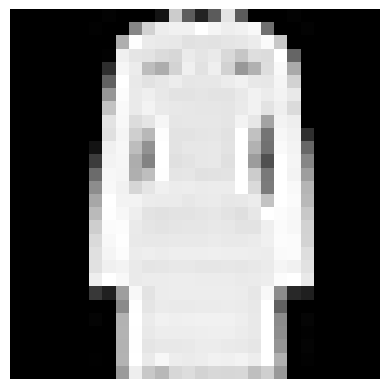

In [56]:
#visualize Image 
plt.imshow(image.squeeze(), cmap='gray')
plt.axis(False)
plt.show()

In [57]:
image.shape

torch.Size([1, 28, 28])

In [58]:
7*7*10

490

Output of conv_block_2: [10, 7, 7]

This will be flattened: 10 * 7 * 7 => 490 

10 --> Hidden units

7 ---> height 

7 ---> weight

This 490 should sent to output layer!

In [59]:
#pass Image through our Tiny VGG model 
random_pred = model_2(image.to(device))

random_pred

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 490x10)

In [ ]:
#prediction 
pred = torch.argmax(random_pred)

print(f'Ground Truth: {class_names[label]}')
print(f'Random Prediction: {class_names[pred]}')

### 7.1 Stepping through nn.Conv2d()

See the documentation: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(RANDOM_SEED)

#create a batch of Images 
images = torch.rand(size=(32, 3, 64, 64)) # [N, C_in, H, W] -> (Batch, Color_channels, Height, Weight)
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test Image: \n {test_image}')

In [ ]:
test_image.shape

In [ ]:
torch.manual_seed(RANDOM_SEED)
#Create a single Conv2d layer 
conv_layer = nn.Conv2d(in_channels=3, 
                      out_channels=10, 
                      kernel_size=(3,3),
                      stride=1,
                      padding=1)

#pass the data through the convolutional layer 
conv_output = conv_layer(test_image)

conv_output.shape

 ### 7.2 Stepping through nn.MaxPool2d()

In [ ]:
test_image.shape

In [ ]:
# print out original image shape without unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')

#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=(2,2))

#Pass data through the conv layer 
test_image_through_conv = conv_layer(test_image)
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

#Pass convoluted image through MaxPool layer
test_image_through_maxpool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through maxpool_layer(): {test_image_through_maxpool.shape}')

#### Example of MaxPool Layer

In [ ]:
torch.manual_seed(RANDOM_SEED)

#create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2)) # [N, C, H, W]

print(f'\n Random Tensor:\n {random_tensor}')
print(f'Random Tensor Shape: {random_tensor.shape}')

#Create a Max Pool layer
maxpool_layer = nn.MaxPool2d(kernel_size=2)

#Pass random tensor through maxpool layer 
max_pool_tensor = max_pool_layer(random_tensor)

print(f'\n MaxPool Tensor: \n {max_pool_tensor}')
print(f'Max Pool tensor shape: {max_pool_tensor.shape}')

In [ ]:
flatten_layer = nn.Flatten(start_dim=0)

In [ ]:
rand_img = torch.rand(size=(10,7,7))

flattened_tensor = flatten_layer(rand_img)

flattened_tensor.shape

### 7.3 Setup Loss Function and Optimizer for `model_2`

In [79]:
from helper_function import accuracy_fn
#setup loss function 
loss_fn = nn.CrossEntropyLoss()

#optimizer 
optimizer = torch.optim.Adam(params=model_2.parameters(), 
                            lr=0.01)

### 7.4 Training Loop & Test Loop

In [80]:
#Random state 
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

#Measure Time 
from timeit import default_timer as timer 
train_time_start_model_2 = timer()

#Hyperparameters
EPOCH = 3

for epoch in tqdm(range(EPOCH)):
    print(f'Epoch: {epoch}\n--------')
    ## Training loop 
    train_step(model=model_2, 
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    ##Test Loop 
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
#end time 
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, 
                                            end=train_time_end_model_2,device=device)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.48973 | Train Acc: 82.193%


 33%|████████████████████████████                                                        | 1/3 [00:24<00:49, 24.60s/it]

Test Loss: 0.40743 | Test Acc: 84.974%
Epoch: 1
--------
Train Loss: 0.37864 | Train Acc: 86.240%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:51<00:25, 25.83s/it]

Test Loss: 0.42112 | Test Acc: 84.794%
Epoch: 2
--------
Train Loss: 0.36596 | Train Acc: 86.765%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:18<00:00, 26.29s/it]

Test Loss: 0.39856 | Test Acc: 85.723%
Train time on cuda: 78.868 seconds


### Flattening Layer working 

In [ ]:
input = torch.randn(32, 10, 7, 7) #[N, C, H, W] 

In [ ]:
32*10*7*7

In [ ]:
flatten_layer = nn.Flatten(start_dim=0)

output = flatten_layer(input)

output.shape

Here we are multiplying batches (32) with 490: 32 * 490 => 15680 

In [ ]:
flatten_layer = nn.Flatten()

output = flatten_layer(input)

output.shape

In [107]:
# Get model_2 results
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, 
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 122.30it/s]


In [108]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.39855852723121643,
 'model_acc': 85.72284345047923}

### 8. Comapare model results and training time.

In [109]:
import pandas as pd 
compare_results = pd.DataFrame([model_0_results, model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477043,83.456470
1,FashionMNISTModelV1,0.432850,85.363419
2,FashionMNISTModelV2,0.398559,85.722843


### Add Training Time to results comparision

In [110]:
compare_results['training_time'] = [total_train_time_model_0,
                                    total_time_model_1, 
                                    total_train_time_model_2  ]

In [111]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.477043,83.456470,46.913373
1,FashionMNISTModelV1,0.432850,85.363419,122.528937
2,FashionMNISTModelV2,0.398559,85.722843,78.867658


Text(0, 0.5, 'model')

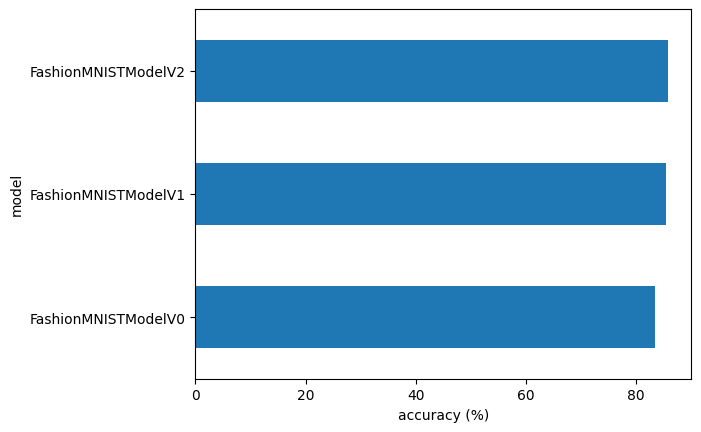

In [112]:
#Visualize our model results 
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

### 9. Make and Evaluate random predictions with best model 

In [113]:
def make_predictions(model: torch.nn.Module, data: list, 
                    device: torch.device = device): 
    pred_probs = []
    #put our model into evaluation
    model.eval()
    model.to(device)
    with torch.inference_mode():
        for sample in data: 
            #prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #forward pass (model outputs raw logits)
            pred_logit = model(sample)

            #get predicition probability (logits --> predictions)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            #get prediction labels
            pred_prob = torch.argmax(pred_prob, dim=0)

            #Get pred_prob off the GPU for further calculations 
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [114]:
import random 
#random.seed(RANDOM_SEED)

test_samples = []
test_labels = [] 
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape 
test_samples[0].shape

torch.Size([1, 28, 28])

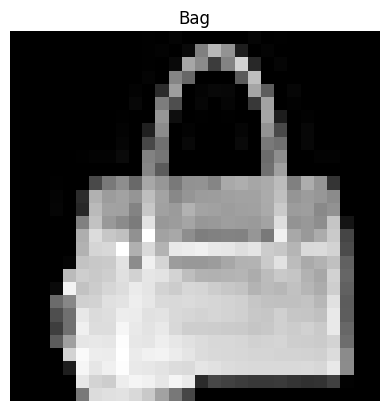

In [115]:
#sample display
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)
plt.show()

In [116]:
#Make Predictions 
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

pred_probs

tensor([8, 1, 4, 4, 2, 0, 4, 7, 9])

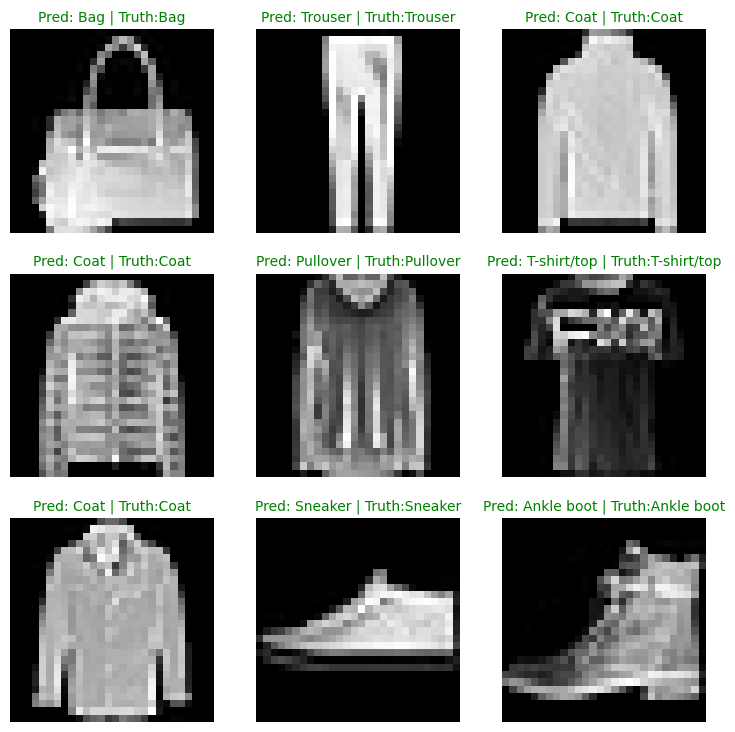

In [117]:
#plot the predictions 
plt.figure(figsize=(9,9))
nrows, ncols = 3,3
for i,sample in enumerate(test_samples):
    #create a subplot 
    plt.subplot(nrows, ncols, i+1)

    #plot target image 
    plt.imshow(sample.squeeze(), cmap='gray')

    #Find the prediction (in text form, e.g: Sandal)
    pred_label = class_names[pred_probs[i]] 

    #get the truth label
    truth_label = class_names[test_labels[i]]

    #create a title for the plot
    title_text = f'Pred: {pred_label} | Truth:{truth_label}'

    #check the equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)

## 10. Making a Confusion Matrix for further predictions Evaluation.

A confusion matrix is a fantastic way of evaluating your classification models visually!

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix()`
3. Plot the Confusion Matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
!pip install mlxtend

In [120]:
#1. Make predictions with trained model 
y_preds = []
model_2.eval() 
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc='Making Predictions...'):
        #put the data on target device
        X, y = X.to(device), y.to(device)
        #forward pass 
        y_logits = model_2(X)
        #turn logits to prediction probs 
        y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)
        #put prediction on CPU
        y_preds.append(y_pred.cpu())
        
#concatenate list of tensor into a single tensor
#print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]

Making Predictions...: 100%|████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 115.22it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [121]:
len(y_preds_tensor)

10000

In [122]:
import mlxtend 
print(f'mlxtend: {mlxtend.__version__}')

mlxtend: 0.23.0


In [123]:
assert int(mlxtend.__version__.split('.')[1]) >= 25, 'mlxtend version should be 0.19.0 or Higher!'

AssertionError: mlxtend version should be 0.19.0 or Higher!

In [124]:
#see if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    print(f'torchmetrics version: {torchmetrics.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 0.19.0 or Higher!'
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    print(f'torchmetrics version: {torchmetrics.__version__}')

mlxtend version: 0.23.0
torchmetrics version: 1.2.1


In [125]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [126]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [127]:
y_preds_tensor[:5]

tensor([9, 2, 1, 1, 6])

In [128]:
test_data.targets[:5]

tensor([9, 2, 1, 1, 6])

In [129]:
#setup confusion instance and compare predictions to target  
conf_mat = ConfusionMatrix(num_classes=len(class_names), task='multiclass') 
conf_mat_tensor = conf_mat(preds=y_preds_tensor, target=test_data.targets)

In [130]:
conf_mat_tensor

tensor([[855,   0,  14,  25,   9,   0,  80,   0,  17,   0],
        [  5, 966,   3,  16,   5,   0,   1,   0,   4,   0],
        [ 11,   1, 644,   7, 261,   0,  68,   0,   8,   0],
        [ 34,  10,  12, 867,  31,   0,  39,   0,   7,   0],
        [  1,   0,  41,  39, 876,   0,  34,   0,   9,   0],
        [  0,   0,   0,   2,   0, 953,   0,  23,   7,  15],
        [175,   1,  58,  28, 193,   0, 518,   0,  27,   0],
        [  0,   0,   0,   0,   0,   9,   0, 957,   1,  33],
        [  2,   1,   2,   4,   5,   5,   8,   2, 971,   0],
        [  0,   0,   0,   2,   1,   4,   0,  27,   1, 965]])

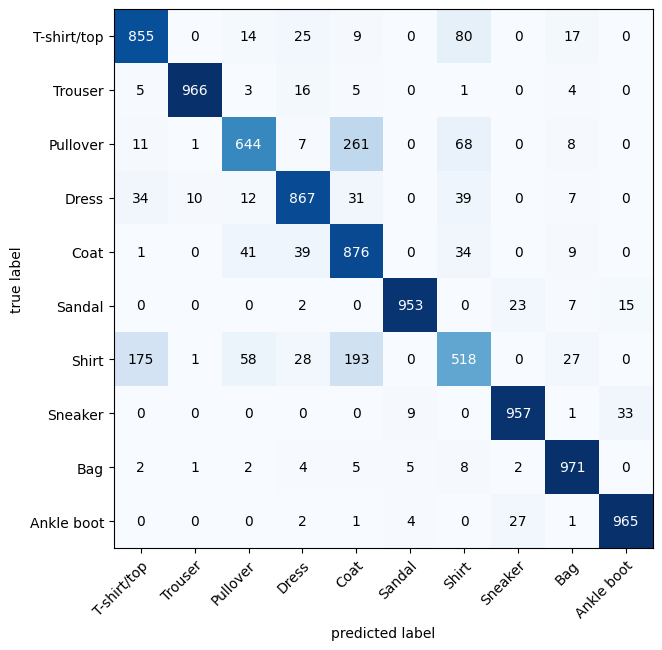

In [131]:
#plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and reload Best performance model

In [104]:
from pathlib import Path 

#create a model directory path 
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create a model save path 
MODEL_NAME = '03_pytorch_computervision_model_2.pth' #pt or pth

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save model state dict 
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computervision_model_2.pth


In [105]:
#random state 
torch.manual_seed(RANDOM_SEED)

#create a new instance of our model 
loaded_model = FashionMNISTModelV2(input_shape=1, hidden_units=10, 
                                  output_shape=len(class_names)) 

#Load in saved state_dict() 
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to the target devcie 
loaded_model.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [132]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.39855852723121643,
 'model_acc': 85.72284345047923}

In [133]:
#Evaluate the loaded model 
torch.manual_seed(RANDOM_SEED)

loaded_model_results = eval_model(model=loaded_model, 
                                  data_loader=test_dataloader, 
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)

loaded_model_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 110.13it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.39855852723121643,
 'model_acc': 85.72284345047923}

In [139]:
## check if model results are close to eachother 
torch.isclose(torch.tensor(model_2_results['model_loss']), 
             torch.tensor(loaded_model_results['model_loss']),
             atol=1e-03)

tensor(True)